# Datasets

We used one matched dataset and one unmatched dataset to compare the kernels that we built. A pair of matched networks has a one-to-one corresponded between every node, whereas a pair of unmatched networks may not even have the same number of vertices. If there is no known matching between the networks in the dataset, then we need to compare the distributions of a given metric for each graph instead of the metric directly. Thus, it is crucial that we modify the kernels accordingly and examine their behaviors for both matched and unmatched networks.

## Matched: [Duke Mouse Whole-Brain Connectomes](https://microsoft.github.io/graspologic/latest/reference/reference/datasets.html#graspologic.datasets.load_mice)

This dataset contains 32 mouse connectomes derived from whole-brain diffusion magnetic resonance imaging of four distinct mouse genotypes: BTBR, B6, CAST, and DBA2. 8 connectomes were generated from each of the four genotypes, and each of the connectomes are represented by a (332, 332) symmetric adjacency matrix. More details can be found in the Graspologic page linked above.

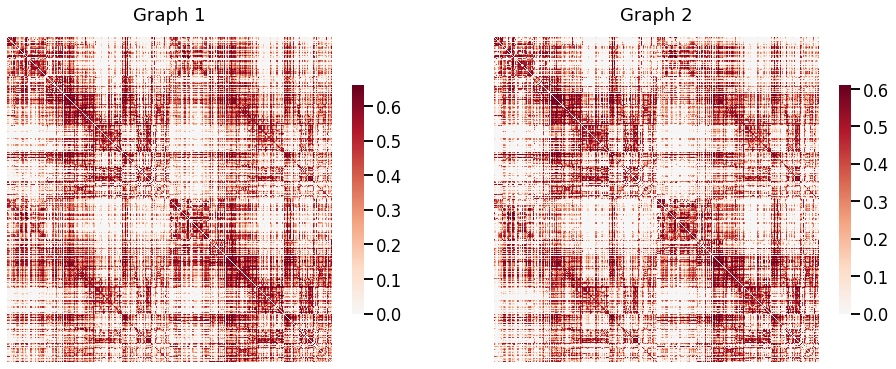

In [2]:
from graspologic.datasets import load_mice
from graspologic.plot import heatmap
import matplotlib.pyplot as plt
from myst_nb import glue
import numpy as np

# load the full mouse dataset into numpy array
mice = load_mice()
graphs = np.array(mice.graphs)

# construct labels
labels = {}
for i in np.arange(0, 332):
    labels[i] = i

# visualize one of the graphs
mice_fig, axes = plt.subplots(1, 2, facecolor='w', figsize=(16,6))
heatmap(graphs[0], context='talk', transform='simple-all', ax=axes[0], title='Graph 1')
heatmap(graphs[15], context='talk', transform='simple-all', ax=axes[1], title='Graph 2')

glue("unmatched_vs_matched", mice_fig, display=False)

```{glue:figure} mice_fig
:name: "mice-heatmap"

Visual representaton of two of the networks of the mouse dataset. They are both symmetric (332, 332) matrices, and we can see that the networks are matched. 
```

## Unmatched: [MaMI (Mammalian MRI)](https://zenodo.org/record/6382386)

This dataset consists of 225 high resolution *ex vivo* scans of 124 animal species spanning 12 taxonomy orders: Carnivora, Certatiodactyla, Chiroptera, Eulipotyphla, Hyracoidea, Lagomorpha, Marsupialia, Perissodactyla, Primates, Rodentia, Scandentia and Xenarthra. Each network was a symmetric (200, 200) matrix. To accomodate for the unequal sample size of each order and also for simplicity, we used half of the samples given for Chiroptera and Primates, the two largest orders in the dataset. More details can be found in the page linked above.

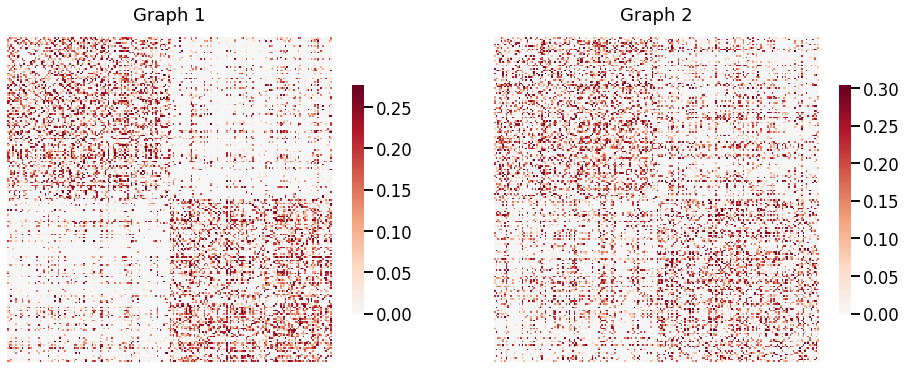

In [3]:
from pathlib import Path
import random
import pandas as pd

# load MaMI dataset 
graphs_all = np.zeros((225, 200, 200))
species_list = []

npy_files = Path('../mami_data/conn').glob('*')
for i, file in enumerate(npy_files):
    graphs_all[i] = np.load(file)
    filestr = str(file).split('/')[-1]
    filestr = filestr.split('.')[0]
    species_list.append(filestr)

random.seed(3)

# construct labels based on taxonomy orders
info_df = pd.read_csv('../mami_data/info.csv')
filenames = info_df.pop("Filename").to_list()
orders_all = info_df.pop("Order").to_list()

order_mapper = {}
for i, filename in enumerate(filenames):
    if orders_all[i] == 'Artiodactyla':
        orders_all[i] = 'Cetartiodactyla'
    order_mapper[filename] = orders_all[i]

labels_all = list(map(order_mapper.get, species_list))

# get subset of labels, graphs
orders = ['Chiroptera', 'Primates']
ind_ch = []
ind_pr = []
labels = []

for i, label in enumerate(labels_all):
    if label == 'Chiroptera':
        ind_ch.append(i)
    elif label == 'Primates':
        ind_pr.append(i)

ind_ch_samp = random.sample(ind_ch, len(ind_ch)//2)
ind_pr_samp = random.sample(ind_pr, len(ind_pr)//2)

ind = ind_ch_samp + ind_pr_samp
ind.sort()
graphs = graphs_all[ind]
labels = list(np.array(labels_all)[ind])

# visualize one of the graphs
mami_fig, axes = plt.subplots(1, 2, facecolor='w', figsize=(16,6))
heatmap(graphs[0], context='talk', transform='simple-all', ax=axes[0], title='Graph 1')
heatmap(graphs[15], context='talk', transform='simple-all', ax=axes[1], title='Graph 2')

glue("unmatched_vs_matched", mami_fig, display=False)

```{glue:figure} mami_fig
:name: "mami-heatmap"

Visual representaton of two of the networks of the MaMI dataset. They are both symmetric (200, 200) block matrices, but we can see that there is no matching between the two networks.
```